<center><h1><b>LABORATORY 1</b></h1></center>

---

In [60]:
library(lubridate)
library(dplyr)
library(geosphere)

# Exercise 1 - NYC bike-sharing data
The repository https://drive.google.com/drive/folders/1NESuaJ5yGIrAli1TgrpnK5hnoxGsMi3h?
usp=sharing contains bike-sharing data provided by New York City, Citi Bike1 sharing system. The
data (in csv format) is structured as follows
- Trip duration (in seconds)
- Start Time and date
- Stop Time and date
- Start Station ID, name, latitude and longitude
- End Station ID, name, latitude and longitude
- Bike ID
- User Type (Customer or Subscriber )
- Birth’s Year
- Gender (0=unknown; 1=male; 2=female)

#### 1. Read the data and import in a data.frame or tibble structure

In [2]:
df2 <- read.table("./data/JC-201902-citibike-tripdata.csv", sep=',',header=T)
df3 <- read.table("./data/JC-201903-citibike-tripdata.csv", sep=',',header=T)
df4 <- read.table("./data/JC-201904-citibike-tripdata.csv", sep=',',header=T)
df5 <- read.table("./data/JC-201905-citibike-tripdata.csv", sep=',',header=T)
df6 <- read.table("./data/JC-201906-citibike-tripdata.csv", sep=',',header=T)

#### 2. Merge the five data frames in an unique structure (If the data is too heavy for your computing resources, you can work with a sufficiently large subsample of it).

In [3]:
tot_df <- rbind(df2, df3, df4, df5, df6)

In [4]:
# debug:
length(tot_df)   # number of columns because data.frames store vector as columns
nrow(tot_df)     # total number of rows
if (nrow(df2)+nrow(df3)+nrow(df4)+nrow(df5)+nrow(df6) == nrow(tot_df) ) {print('ok')}
class(tot_df)    # class 'data.frame'
typeof(tot_df)   # 'list' because internally is a list (of vectors)

[1] 15

[1] 150792

[1] "ok"


[1] "data.frame"

[1] "list"

#### 3. Check for missing data and remove it, if any.

In [5]:
df_r <- nrow(tot_df)
df_c <- ncol(tot_df)

for (i in 1:df_r) { 
    for (j in 1:df_c) {
        if (is.na(tot_df[i, j])) {
            print("dato mancante")
        }
    }
}

shorter alternative:

In [6]:
sum( is.na(tot_df) )

[1] 0

another alternative:

In [7]:
tot_df <- na.omit(tot_df)
nrow(tot_df)

[1] 150792

#### 4.1 Compute the average and the median trip duration in minutes.

In [8]:
mean_trip_time <- mean( tot_df[,1] )/60
median_trip_time <- median( tot_df[,1] )/60
print(paste('Mean trip duration:  ', format(mean_trip_time,digits=4), 'min'))
print(paste('Median trip duration:', format(median_trip_time,digits=3), 'min'))

[1] "Mean trip duration:   12.81 min"
[1] "Median trip duration: 5.68 min"


#### 4.2 Evaluate the minimum and maximum trip duration; does that seem like a plausible value?

In [9]:
max_trip_time <- max( tot_df[,1] )/60
min_trip_time <- min( tot_df[,1] )/60
print(paste('Max trip duration:  ', format(max_trip_time/60/24,digits=3), 'days'))
print(paste('Min trip duration:  ', format(min_trip_time,digits=3), 'min'))

[1] "Max trip duration:   20 days"
[1] "Min trip duration:   1.02 min"


It's too much time for a single real trip!

#### 4.3 Repeat the calculation of the average (and the median) trip duration by excluding trips longer than 3 hours. Next, evaluate the number of skimmed entries.

In [10]:
df_fixed <- tot_df[ tot_df[,1]<= 3*3600, ]     # corrected total dataframe
trip_fixed <- df_fixed$tripduration            # I take the first column as a vector
mean_fixed <- mean(trip_fixed)/60
median_fixed <- median(trip_fixed)/60
print(paste('Mean trip duration:  ', format(mean_fixed,digits=3), 'min'))
print(paste('Median trip duration:', format(median_fixed,digits=3), 'min'))
excluded <- nrow(tot_df)-nrow(df_fixed)
print(paste('Number of skimmed entries:', excluded ) )

[1] "Mean trip duration:   9.22 min"
[1] "Median trip duration: 5.67 min"
[1] "Number of skimmed entries: 427"


#### 4.4 plot the distribution of trip duration after the skimming of the previous point

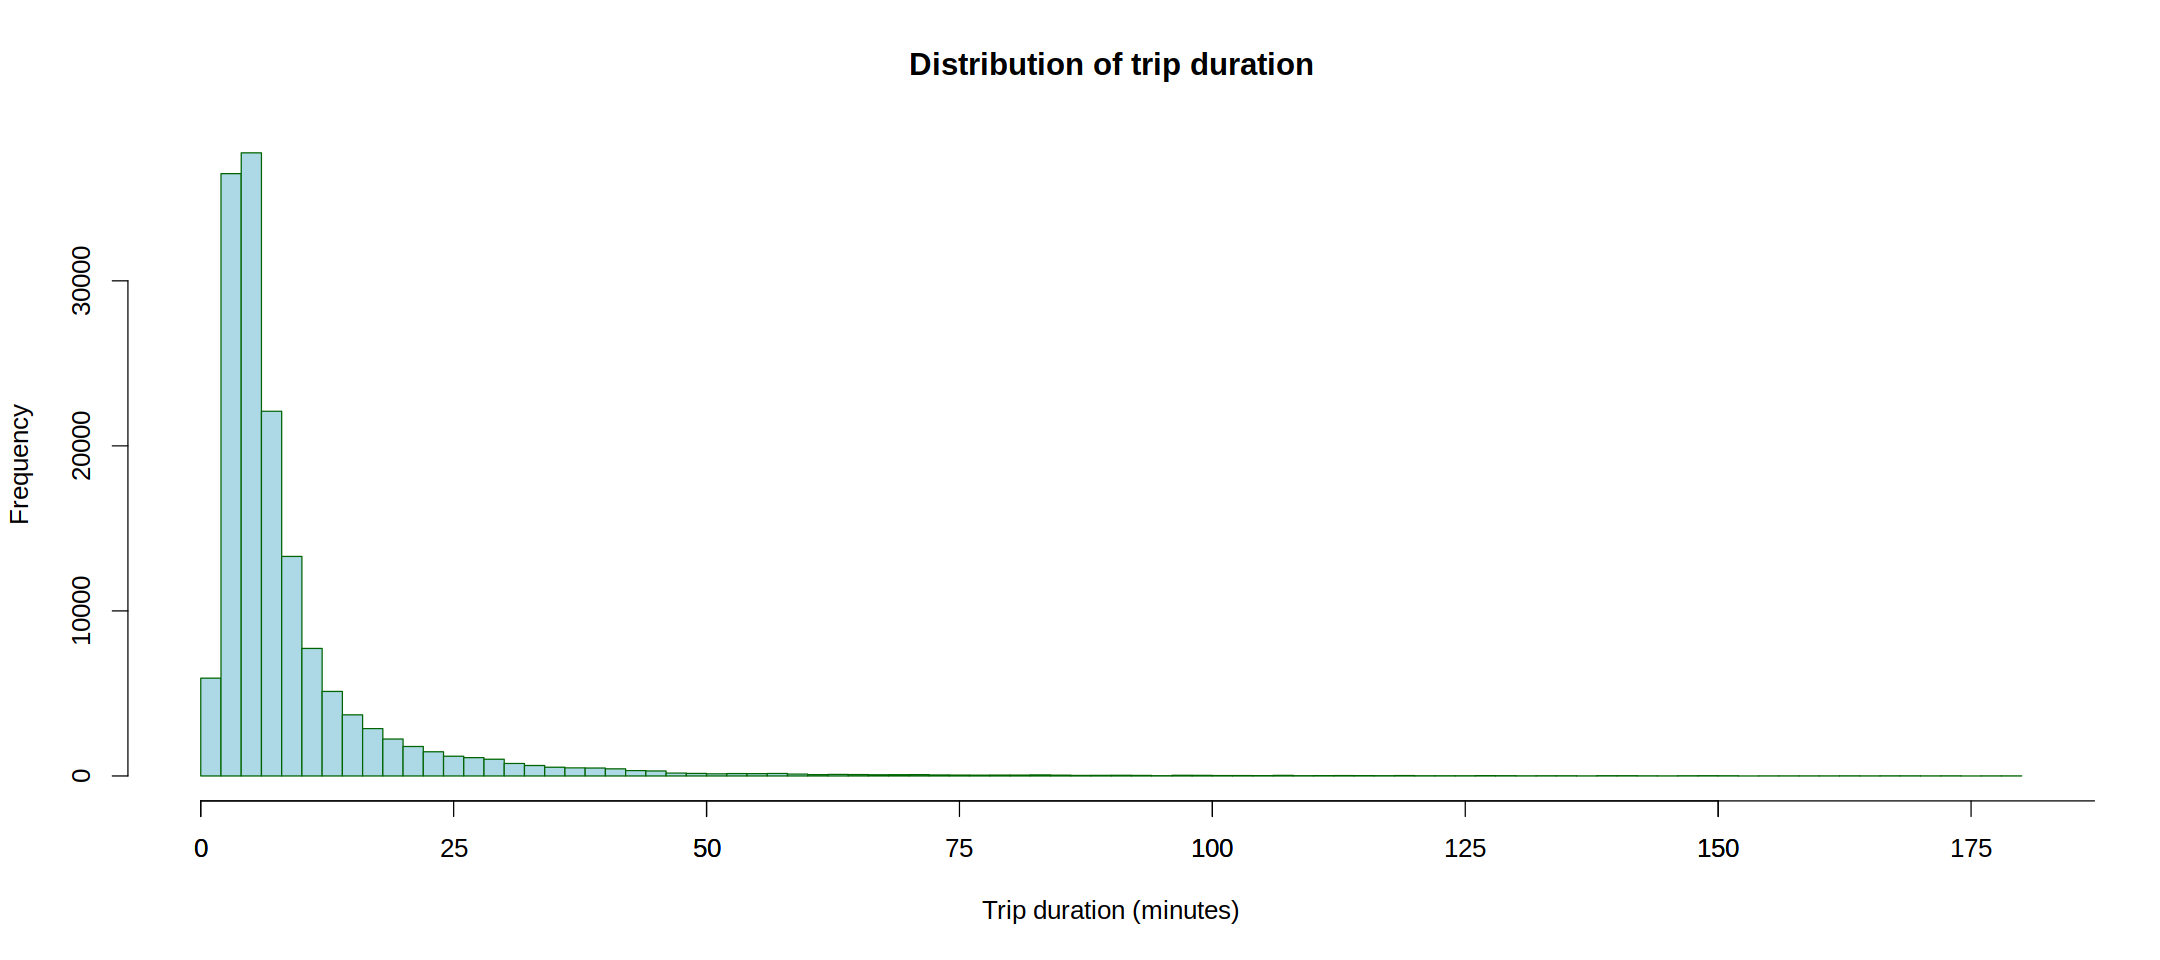

In [11]:
options(repr.plot.width = 18, repr.plot.height = 8)
par(cex = 1.3)                        # bigger font
hist(trip_fixed/60, breaks=100, 
     col='lightblue', border='darkgreen', xlab='Trip duration (minutes)', main='Distribution of trip duration')
axis(side = 1, at = seq(0,200,25) )   # x-ticks on x-axis

#### 5. plot the monthly average trip duration

In [12]:
# debug:
datetime_str <- "2019-02-01 17:46:32.7540"
datetime <- ymd_hms(datetime_str)
print(datetime)
class(datetime)
month(datetime) == 2

[1] "2019-02-01 17:46:32 UTC"


[1] "POSIXct" "POSIXt"

[1] TRUE

In [13]:
# FINDING AVERAGES:
means_month <- numeric(12)    # vector of zeros
for (m in 1:12) {
    trip_per_month <- df_fixed[ month(df_fixed$starttime) == m, ]$tripduration   # I take a vector of the tripduration for each months
    # I add an 'if' statemente because if trip_per_month is empty the 'mean' function returns 'NaN'
    if (length(trip_per_month) != 0) { means_month[m] <- mean( trip_per_month ) }
}
means_month

[1]   0.0000 413.6234 458.7387 533.3461 583.4222 665.3530   0.0000   0.0000
 [9]   0.0000   0.0000   0.0000   0.0000

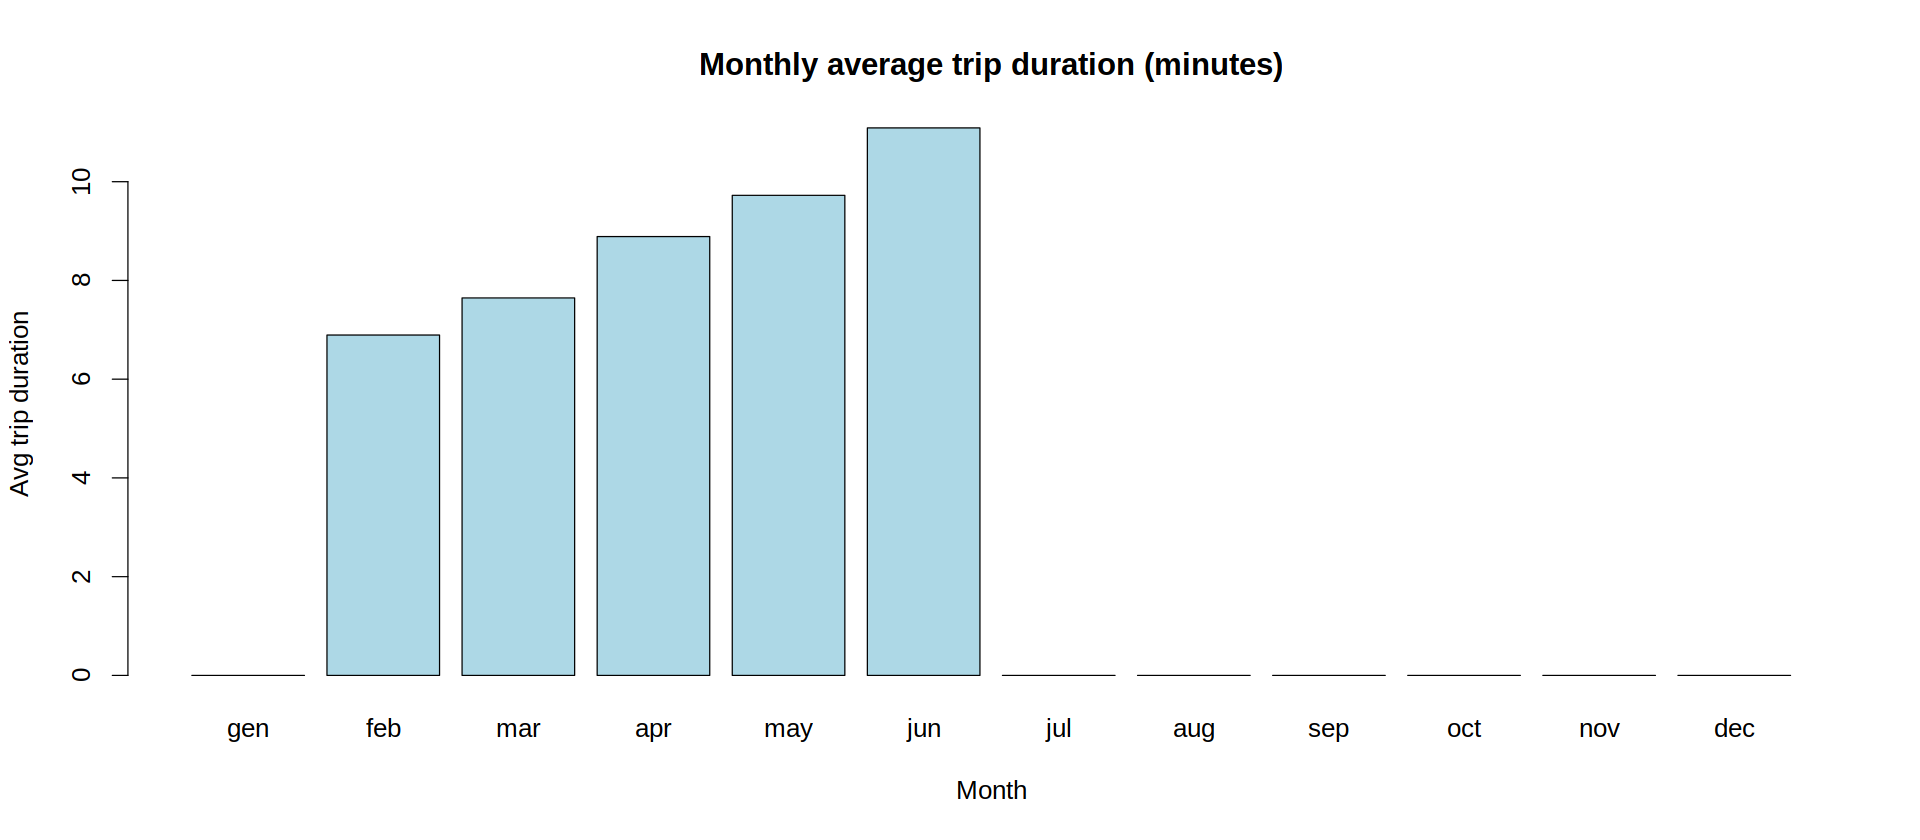

In [14]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3) 
names <- c('gen', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')
barplot(means_month/60, 
        col='lightblue', names.arg=names,
        main='Monthly average trip duration (minutes)', xlab='Month', ylab='Avg trip duration')

#### 6.1 plot the average number of rides per day of the week

MANUAL WAY TO DO IT:

In [15]:
# df_fixed$yday <- yday( df_fixed$starttime )      # I add a column with the number of the day in the year

# sum_week <- numeric(7)       # this will sum up the number or rides for each weekday
# count_week <- numeric(7)     # this will count the days (in order to do the mean of the rides in a day)

# # I write a for over all the days in the dataset
# for ( d in unique(df_fixed$yday) ) {
#     # I extract the rides done in the 'd' day:
#     data_rides <- df_fixed[ yday( df_fixed$starttime ) == d , ]
#     num_rides <- nrow( data_rides )
#     # I find which weekday was the 'd' day:
#     w <- wday( data_rides$starttime[1] )    # I take the first ride as sample (it's indifferent because all days here are the same day)
#     # I update the counter:
#     sum_week[w] <- sum_week[w] + num_rides
#     count_week[w] <- count_week[w] + 1
# }

# # Compute the average number of rides for each weekday
# average_rides_per_weekday <- sum_week / count_week
# average_rides_per_weekday

MAYBE CORRECT WAY:

In [16]:
# Add a column with the year day:
df_fixed$yearday <- yday(df_fixed$starttime)
# Add a column with the weekday
df_fixed$weekday <- wday(df_fixed$starttime)
# let's count the total number of rides in each day of the week:
tot_rides_per_weekday <- tapply(df_fixed$starttime, df_fixed$weekday, length)
# let's count the number of recorded days for each day of the week:
df_unique_yeardays <- df_fixed %>%
  group_by(weekday) %>%  # Group by weekday
  summarize(unique_yeardays_count = n_distinct(yearday))  # Count unique yeardays for each weekday
# Element-wise division:
avg_rides_per_weekday <- tot_rides_per_weekday / df_unique_yeardays$unique_yeardays_count
avg_rides_per_weekday


1         2         3         4         5         6         7 
 742.4545 1027.5714 1099.9048 1153.4762 1058.3333 1070.5909  879.6818

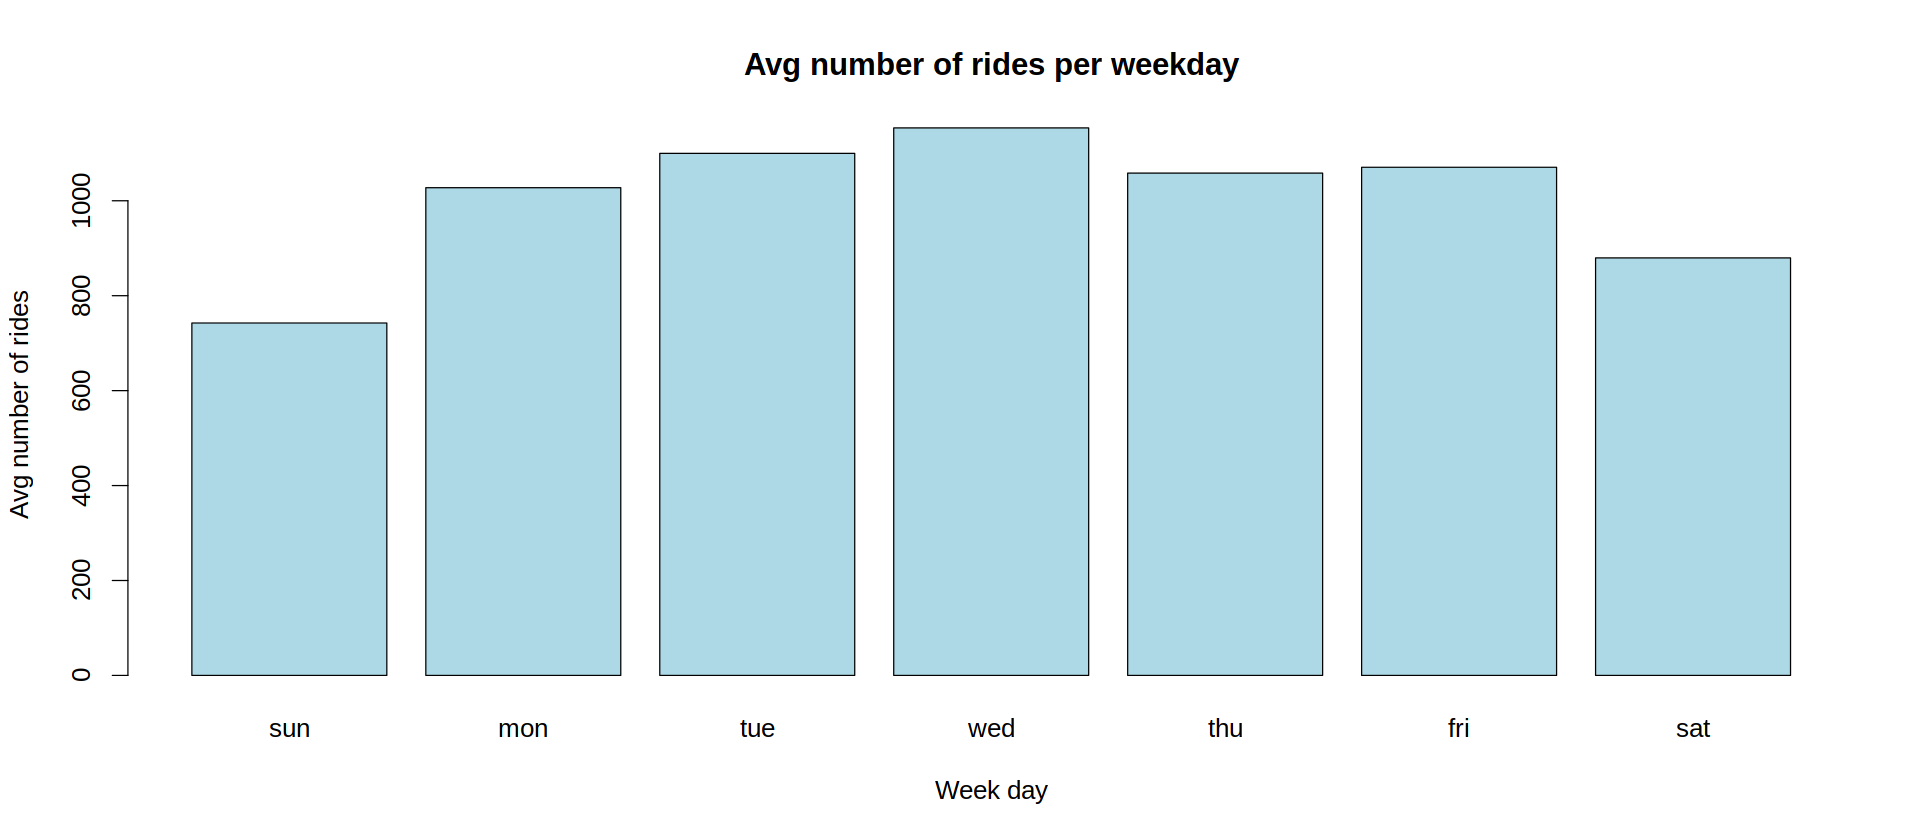

In [17]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3) 
names <- c('sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat')
barplot(avg_rides_per_weekday, 
        col='lightblue', names.arg=names,
        main='Avg number of rides per weekday', xlab='Week day', ylab='Avg number of rides')

MAYBE WRONG WAY TO DO IT:

In [18]:
# # Add a column with the year day:
# df_fixed$yearday <- yday(df_fixed$starttime)
# # Add a column with the weekday
# df_fixed$weekday <- wday(df_fixed$starttime)

# df_summary <- df_fixed %>%
#   group_by(weekday) %>% 
#   summarize(num_rides = n() )  # Count the number of rides (rows) and take the mean

# # View the summary
# print(df_summary)


In [19]:
# # PLOT:
# options(repr.plot.width = 16, repr.plot.height = 7)
# par(cex = 1.3) 
# names <- c('sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat')
# barplot(df_summary$num_rides, 
#         col='lightblue', names.arg=names,
#         main='Avg number of rides per weekday', xlab='Week day', ylab='Avg number of rides')

#### 6.2 plot the hourly distribution on weekdays and on weekends

In [52]:
# weekdays: Monday (2) to Friday (6)
starttime_wday <- df_fixed[ df_fixed$weekday %in% 2:6, ]$starttime
hour_wday <- hour(starttime_wday)

# weekends: Sunday (1) and Saturday (7)
starttime_wend <- df_fixed[ df_fixed$weekday %in% c(1, 7), ]$starttime
hour_wend <- hour(starttime_wend)


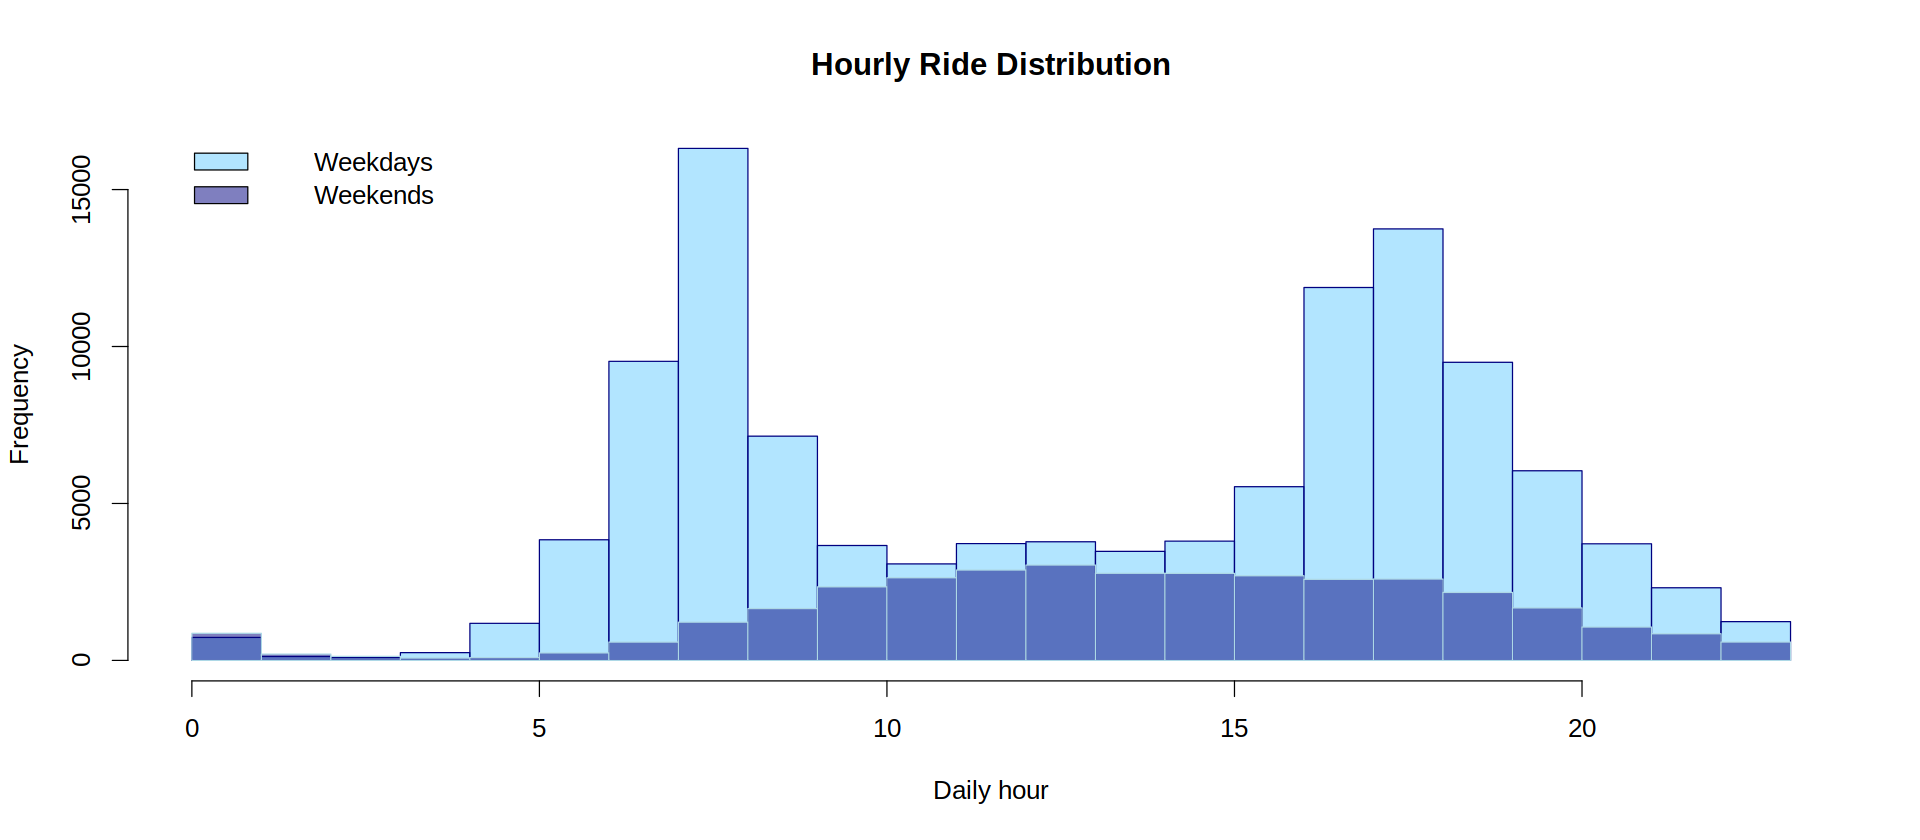

In [54]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3)

hist(hour_wday, 
     col = rgb(0.4, 0.8, 1, 0.5), 
     border = 'navy',
     xlab = 'Daily hour', 
     main = 'Hourly Ride Distribution',
     breaks=0:23)

hist(hour_wend, 
     col = rgb(0, 0, 0.5, 0.5),  
     border = 'lightblue',
     breaks=0:23,
     add = TRUE)

# Aggiungo la legenda
legend("topleft", 
       bty = "n",    # without border
       legend = c("Weekdays", "Weekends"),
       fill = c(rgb(0.4, 0.8, 1, 0.5), rgb(0, 0, 0.5, 0.5)),
       border = "black")


#### 6.3 plot again the average hourly distribution on weekdays but separating customer and subscriber users

In [44]:
# weekdays for customers
starttime_cus <- df_fixed[ df_fixed$weekday %in% 2:6 & df_fixed$usertype=="Customer", ]$starttime
hour_cus <- hour(starttime_cus)

# weekdays for subscribers
starttime_sub <- df_fixed[ df_fixed$weekday %in% 2:6 & df_fixed$usertype=="Subscriber", ]$starttime
hour_sub <- hour(starttime_sub)

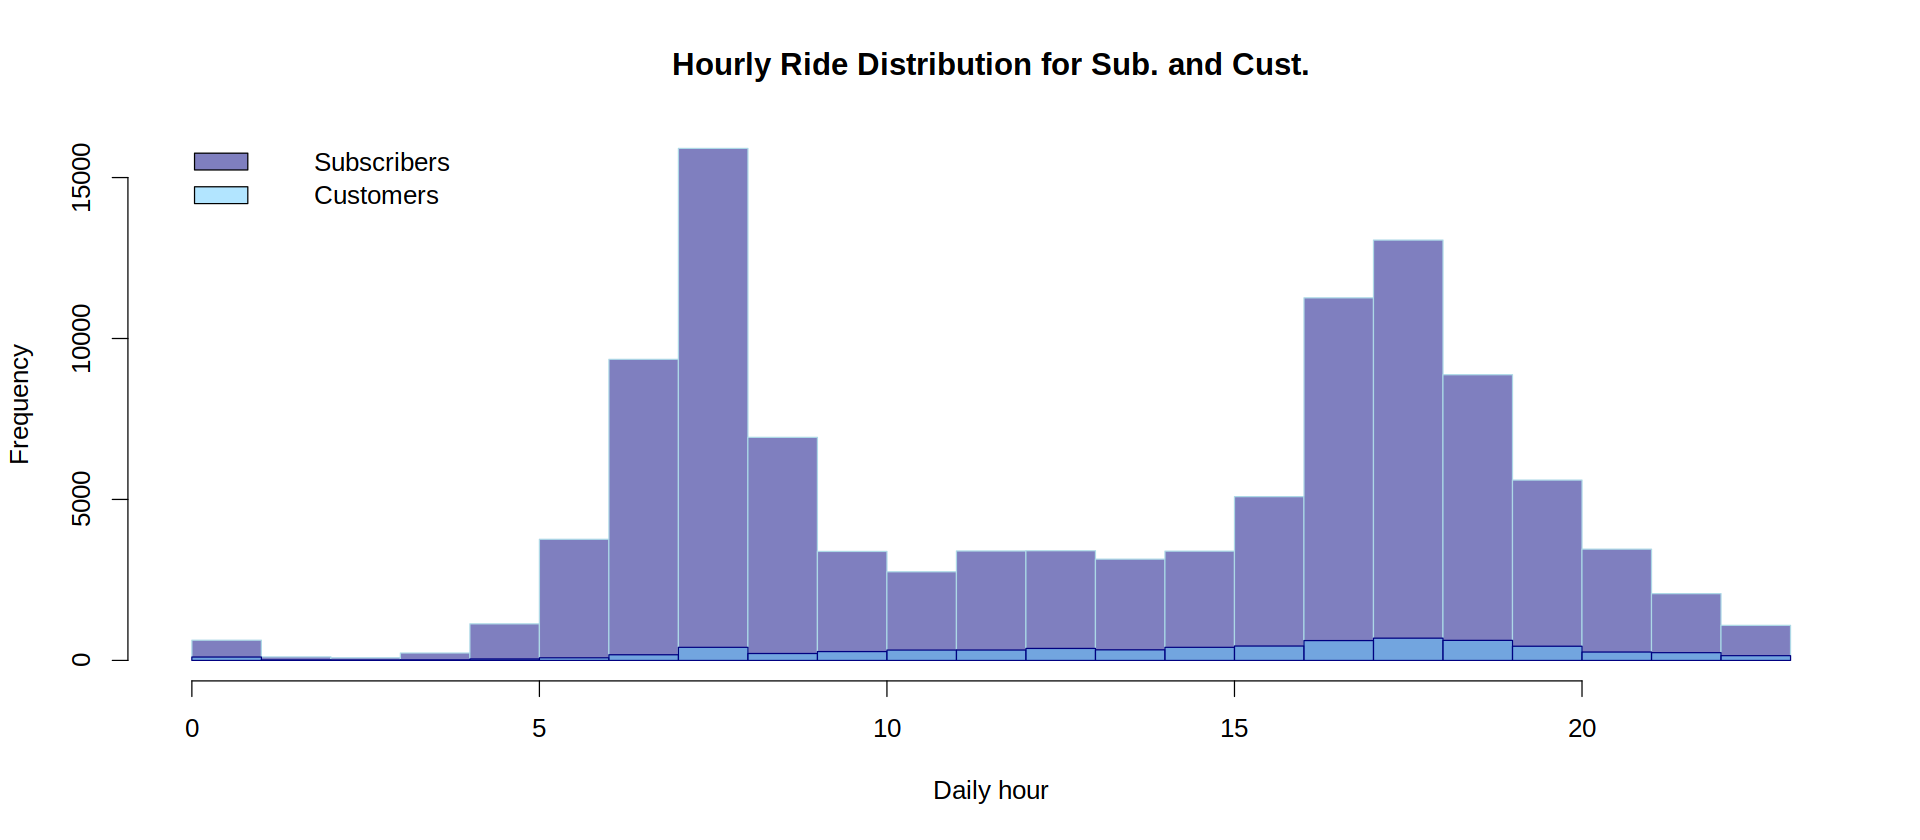

In [58]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3)

hist(hour_sub, 
     col = rgb(0, 0, 0.5, 0.5),  
     border = 'lightblue',
     xlab = 'Daily hour', 
     main = 'Hourly Ride Distribution for Sub. and Cust.',
     #freq=FALSE,
     breaks=0:23
     )

hist(hour_cus, 
     col = rgb(0.4, 0.8, 1, 0.5), 
     border = 'navy',
     xlab = 'Daily hour', 
     main = 'Hourly Ride Distribution',
     breaks=0:23,
     #freq=FALSE,
     add = TRUE)


legend("topleft", 
       bty = "n",    # without border
       legend = c("Subscribers", "Customers"),
       fill = c(rgb(0, 0, 0.5, 0.5), rgb(0.4, 0.8, 1, 0.5)),
       border = "black")

#### 7.1 using the latitude and longitude information, evaluate the average speed (in km/h) of a user, discarding the trip lasting longer than 1 hour

In [122]:
# retrievening coordinates:
df_filtered <- df_fixed[ df_fixed$tripduration <= 3600 , ]
start_lat <- df_filtered$start.station.latitude
start_lon <- df_filtered$start.station.longitude
end_lat   <- df_filtered$end.station.latitude
end_lon   <- df_filtered$end.station.longitude
# computing distances (in meters):
df_filtered$distances <- distHaversine( 
    matrix( cbind(start_lon, start_lat), ncol=2 ), 
    matrix( cbind(end_lon, end_lat), ncol=2 ) )
# compute speed (in km/h):
df_filtered$speed <- (distances/1000) / (df_filtered$tripduration/3600) 
print(paste('Mean speed: ', format(mean(speed),digits=4), 'km/h'))
print(paste('Max speed:  ', format(max(speed),digits=3), 'km/h'))
print(paste('Min speed:  ', format(min(speed),digits=3), 'km/h'))

[1] "Mean speed:  9.24 km/h"
[1] "Max speed:   89 km/h"
[1] "Min speed:   0 km/h"


In [123]:
# debug
head(sort(speed, decreasing = TRUE), 20)
sort(speed)[5500:5700]

[1] 89.00614 87.31971 78.12524 63.32345 26.94001 24.30533 23.71583 23.29261
 [9] 23.05248 23.05248 22.81725 22.81725 22.70218 22.58677 22.47081 22.45007
[17] 22.36090 22.30701 22.13951 22.02642

[1] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
  [8] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [15] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [22] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [29] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [36] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [43] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [50] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [57] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [64] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [71] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [78] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [85] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [92] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
 [99] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[106] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[113] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[120] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[127] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[134] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[141] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[148] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[155] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[162] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[169] 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000
[176] 0.0000000 0.0000000 0.0000000 0.0000000 0.1966356 0.2143211 0.2188527
[183] 0.2204754 0.2212415 0.2215895 0.2241062 0.2248723 0.2251289 0.2266155
[190] 0.2281879 0.2293816 0.2326688 0.2340059 0.2352818 0.2434614 0.2444416
[197] 0.2455707 0.2487863 0.2510221 0.2616389 0.2628040

There are few strange high speed averages, probably wrong data, and also many with speed 0. Let's exclude them.

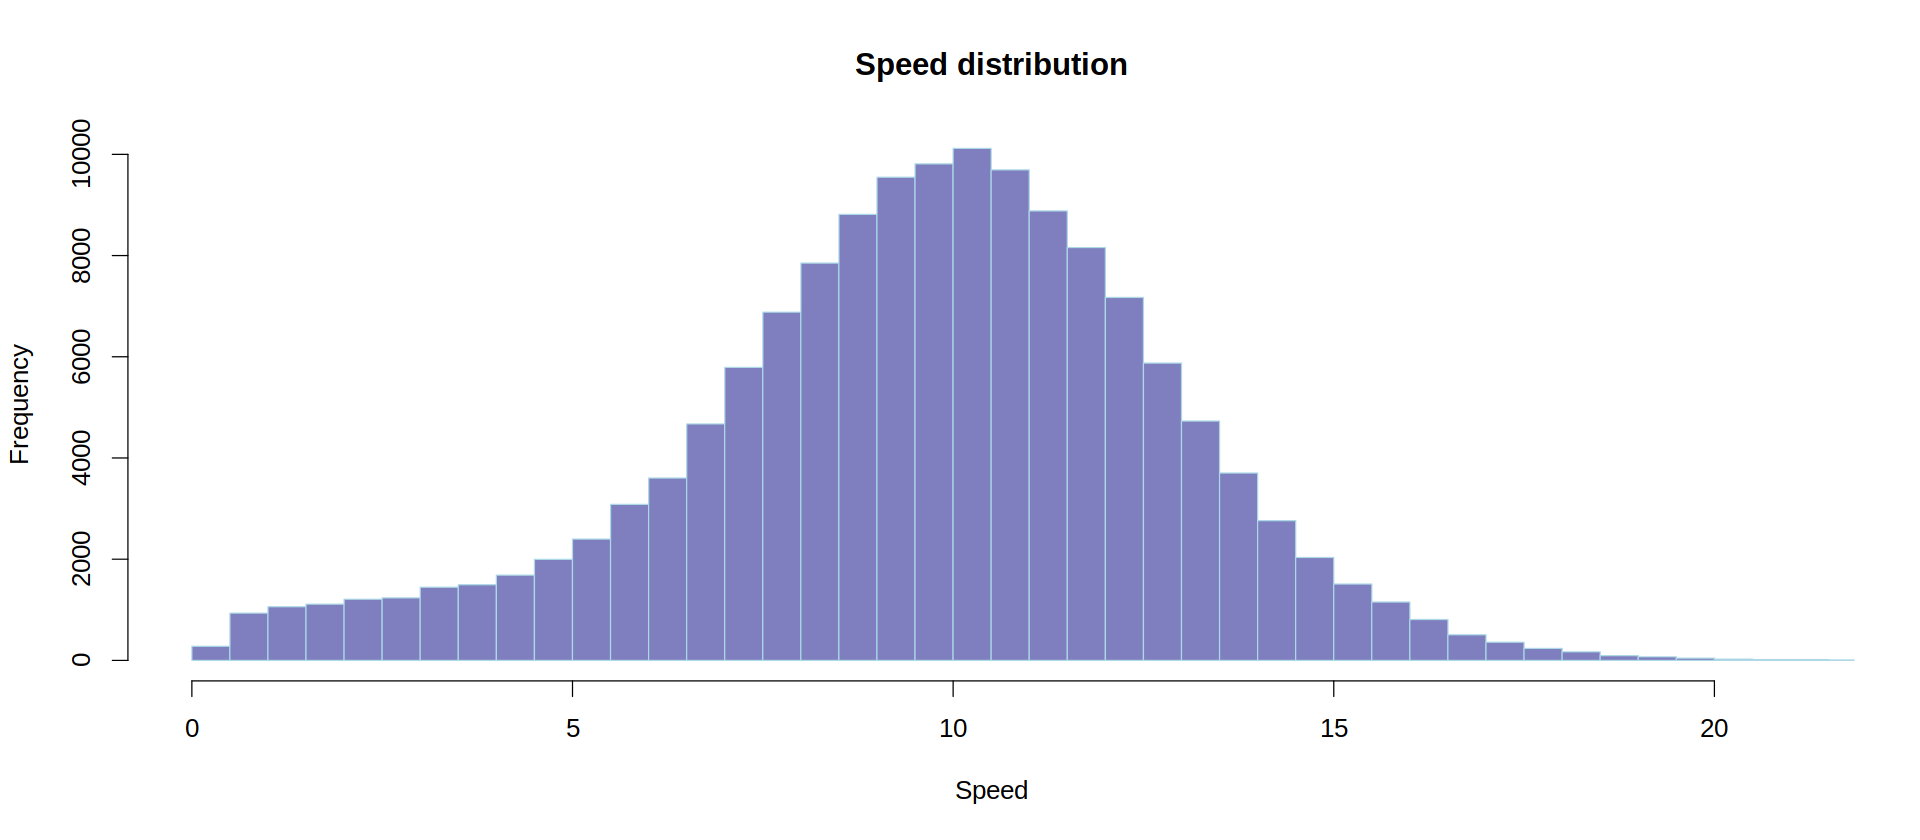

In [124]:
# PLOT of the distribution excluding higher speed:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3)

speed_clean <- speed[ speed < 50 & speed > 0.1 ]
hist(speed_clean, 
     col = rgb(0, 0, 0.5, 0.5),  
     border = 'lightblue',
     xlab = 'Speed', 
     main = 'Speed distribution',
     xlim=c(0,21),
     breaks=40  )

# axis(side = 1, at = seq(0,20,5) )   # x-ticks on x-axis

#### 7.2 plot the average speed as a function of route length for the following group of distances d < 500 m, 500 m < d < 1000 m, 1000 m < d < 2000 m, 2000 m < d < 3000 m, d > 3000 m and discarding trips longer than 1 hour

In [128]:
# debug:
head(sort(df_filtered$distances, decreasing = TRUE), 20)

[1] 11521.350 11521.350 11521.350 10199.028  7119.774  6179.722  6179.722
 [8]  6131.143  5881.094  5877.612  5725.610  5600.122  5294.378  5171.368
[15]  5171.368  4980.743  4980.743  4980.743  4980.743  4980.743

In [127]:
lim <- c(0, 500, 1000, 2000, 3000, 1000000)    # last value is arbitrary big and only useful for the for loop
avg_speed <- numeric( length(lim)-1 )            # vector that will be filled with the avg speed for each disatnce group

for (i in seq(1,length(lim)-1)) {
    # I isolate the the data in each group of distances:
    df_group_i <- df_filtered[ df_filtered$distances>lim[i] & df_filtered$distances<lim[i+1], c('distances','speed')  ]
    # I take the mean speed of that group of distances:
    avg_speed[i] <- mean( df_group_i$speed )
}

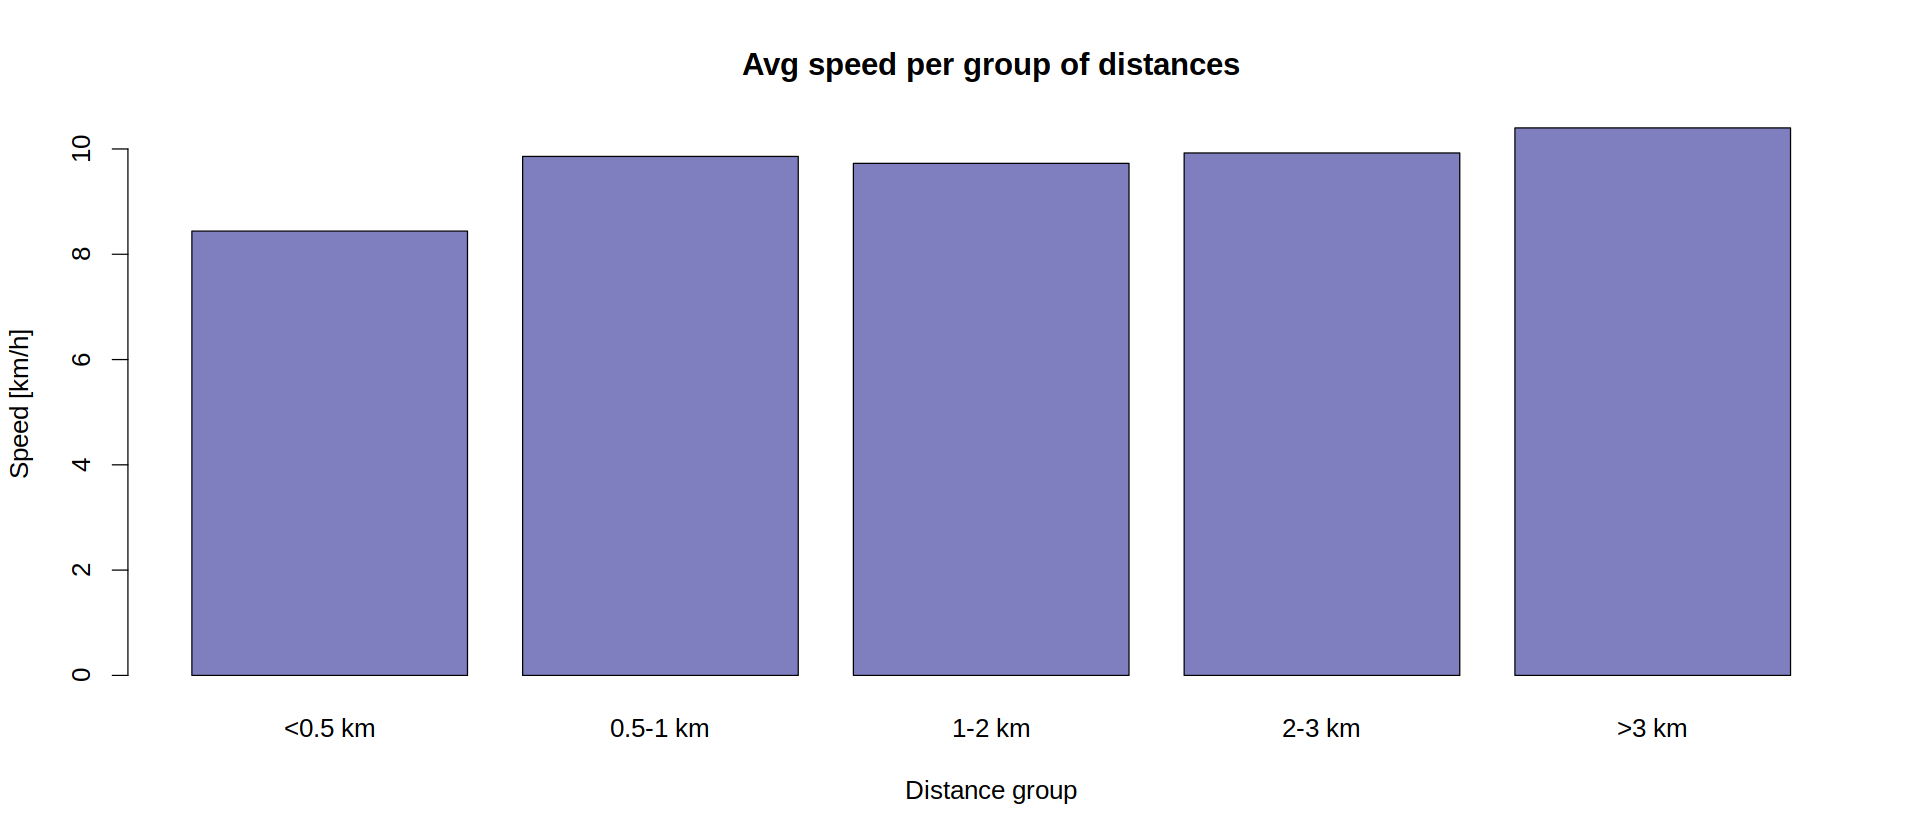

In [133]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 7)
par(cex = 1.3)

categ_names <- c( '<0.5 km', '0.5-1 km', '1-2 km', '2-3 km', '>3 km' )
barplot( avg_speed, names.arg=categ_names, col = rgb(0, 0, 0.5, 0.5), 
        main='Avg speed per group of distances', xlab='Distance group', ylab='Speed [km/h]'  )

#### 8.1 find the most common start station and the least popular end station

In [134]:
names(df_fixed)

[1] "tripduration"            "starttime"              
 [3] "stoptime"                "start.station.id"       
 [5] "start.station.name"      "start.station.latitude" 
 [7] "start.station.longitude" "end.station.id"         
 [9] "end.station.name"        "end.station.latitude"   
[11] "end.station.longitude"   "bikeid"                 
[13] "usertype"                "birth.year"             
[15] "gender"                  "yearday"                
[17] "weekday"

In [165]:
start_freq <- sort( table( df_fixed$start.station.name ) )
print(paste('More common start station: ', names(start_freq)[length(start_freq)], 'with ', start_freq[length(start_freq)], 'instances.' ))

end_freq <- sort( table( df_fixed$end.station.name ) )
print('Least common end stations with 1 appearance:')
print(paste('       ', names(end_freq)[ end_freq==1 ]) )


[1] "More common start station:  Grove St PATH with  17871 instances."
[1] "Least common end stations with 1 appearance:"
 [1] "        1 Ave & E 16 St"          "        8 Ave & W 52 St"         
 [3] "        Amsterdam Ave & W 73 St"  "        E 33 St & 5 Ave"         
 [5] "        Norfolk St & Broome St"   "        South St & Gouverneur Ln"
 [7] "        Spruce St & Nassau St"    "        W 15 St & 10 Ave"        
 [9] "        W 15 St & 6 Ave"          "        W 20 St & 11 Ave"        
[11] "        W 27 St & 10 Ave"         "        W 38 St & 8 Ave"         
[13] "        W 43 St & 6 Ave"          "        W 56 St & 10 Ave"        
[15] "        West St & Chambers St"   


#### 8.2 find the three most common routes (start and end station) and the three least popular ones

In [195]:
# I create a data.frame with the pairs 'start station- end station'
df_counter <- df_fixed %>%
   group_by(start.station.name, end.station.name) %>%    # group by the pairs of stations
   summarise(count = n(), .groups = "drop") %>%          # count the appearances of the pairs
   arrange(desc(count))                                  # descending sorting

print( paste( "Three most common routes:") )
print(head(route_counter, 3))
print( paste( "Three least common routes:") )
print(tail(route_counter, 3))

[1] "Three most common routes:"
  start.station.name end.station.name count
1      Hamilton Park    Grove St PATH  3037
2      Grove St PATH    Hamilton Park  2318
3    Brunswick & 6th    Grove St PATH  1915
[1] "Three least common routes:"
     start.station.name        end.station.name count
2397            York St         Brunswick & 6th     1
2398            York St Communipaw & Berry Lane     1
2399            York St            Lincoln Park     1


---

# Exercise 2 - Parallel pixelated-sensors
A detector designed for charge identification of incoming particles consists of two parallel planes, each composed of an 8×8 array of pixelated sensors. The collected data is stored in the file available in the repository https://drive.google.com/file/d/1dYPF5tL3qnBmTVbawyKbPOQooi_CCElV/view?usp=sharing, where:
* The first 64 columns correspond to the response of the pixels in the upstream matrix.
* The next 64 columns correspond to the response of the pixels in the downstream matrix.

Each pixel is indexed according to the following formula:
$$ Pixel Index = Row + Column × Ncols $$
where Ncols = 8 is the total number of columns in the matrix.

#### 1. For each event (one row of the csv file corresponds to one event) and for each 8 × 8 matrix, perform the following steps:
1. Check for missing values in the dataset and handle them appropriately.
2. Determine the maximum and second maximum pixel values.
3. Identify the corresponding pixel indices.

In [1]:
data_raw <- read.table("./data_2/l2tree_maxedeptrack_str_20241119_072440_BTff3_ThetaMax60_TrgFlgAll_codver3_onlyMTX.csv", sep=',',header=T)
data <- na.omit(data_raw)     # let's omit Not Available data
idx_all_zero <- apply(data, 1, function(x) all(x == 0))   # search for rows with all zeros
data <- data[ !idx_all_zero, ]                            # take only rows with at least one value different from zero

In [2]:
# debug
length(data_raw)                  # number of columns
n_raw <- nrow(data_raw); n_raw    # number of initial rows         
n <- nrow(data); n                # number of rows after cleaning

[1] 143

[1] 100000

[1] 48746

There were not missing data. Bu there were many empty rows. ACTUALLY HALF OF THE DATASET IS FULL OF 0

In [4]:
# I first split the data of the two matrixes of pixels:
data_up   <- data[,1:64]                             
data_down <- data[,65:128]

# LET'S FIND THE INDEXES OF THE MAXIMUM OF EACH ROW FOR EACH MATRIX:
data$idx_max_up  <- apply(data_up, 1, function(x) order(x, decreasing = TRUE)[1])       # I find the index of the max value for each row
data$idx_max2_up <- apply(data_up, 1, function(x) order(x, decreasing = TRUE)[2])       # index of 2nd max value
data$idx_max_down  <- apply(data_down, 1, function(x) order(x, decreasing = TRUE)[1])   # same thing for down matrix
data$idx_max2_down <- apply(data_down, 1, function(x) order(x, decreasing = TRUE)[2])

# LET'S TAKE THE VALUE OF EACH MAXIMUM:
data$max_up  <- data_up[ cbind(1:n, data$idx_max_up) ]          # with cbind I obtain a matrix of 'coordinates' like (row, column)
data$max2_up <- data_up[ cbind(1:n, data$idx_max2_up) ]
data$max_down  <- data_down[ cbind(1:n, data$idx_max_down) ]
data$max2_down <- data_down[ cbind(1:n, data$idx_max2_down) ]

In [7]:
# debug:
head(data$idx_max_up)
class(data$idx_max_up)
data_up[1, data$idx_max_up[1]]
data$max_up[1]
max(data_up[1,])

[1] 44 29 37 52 37 36

[1] "integer"

[1] 26387.9

[1] 26387.9

[1] 26387.9

Manual (slower) way:

In [23]:
# data_up   <- data[,1:64]                             # I first split the data of the two matrixes of pixels
# data_down <- data[,65:128]
# idx_max_up   <- apply(data_up, 1, which.max)         # I find the index of the max value for each row
# idx_max_down <- apply(data_down, 1, which.max)

# # I put the max at 0 so I can find the second max always using 'max' fucntion
# for (i in 1:nrow(data) ) {
#   data_up[i, idx_max_up[i] ] <- 0
#   data_down[i, idx_max_down[i] ] <- 0
# }

# idx_max2_up   <- apply(data_up, 1, which.max)         # I find the index of tha second max value for each row
# idx_max2_down <- apply(data_down, 1, which.max)

#### 2. Plot the distributions of the indices corresponding to the maximum and second maximum pixel values

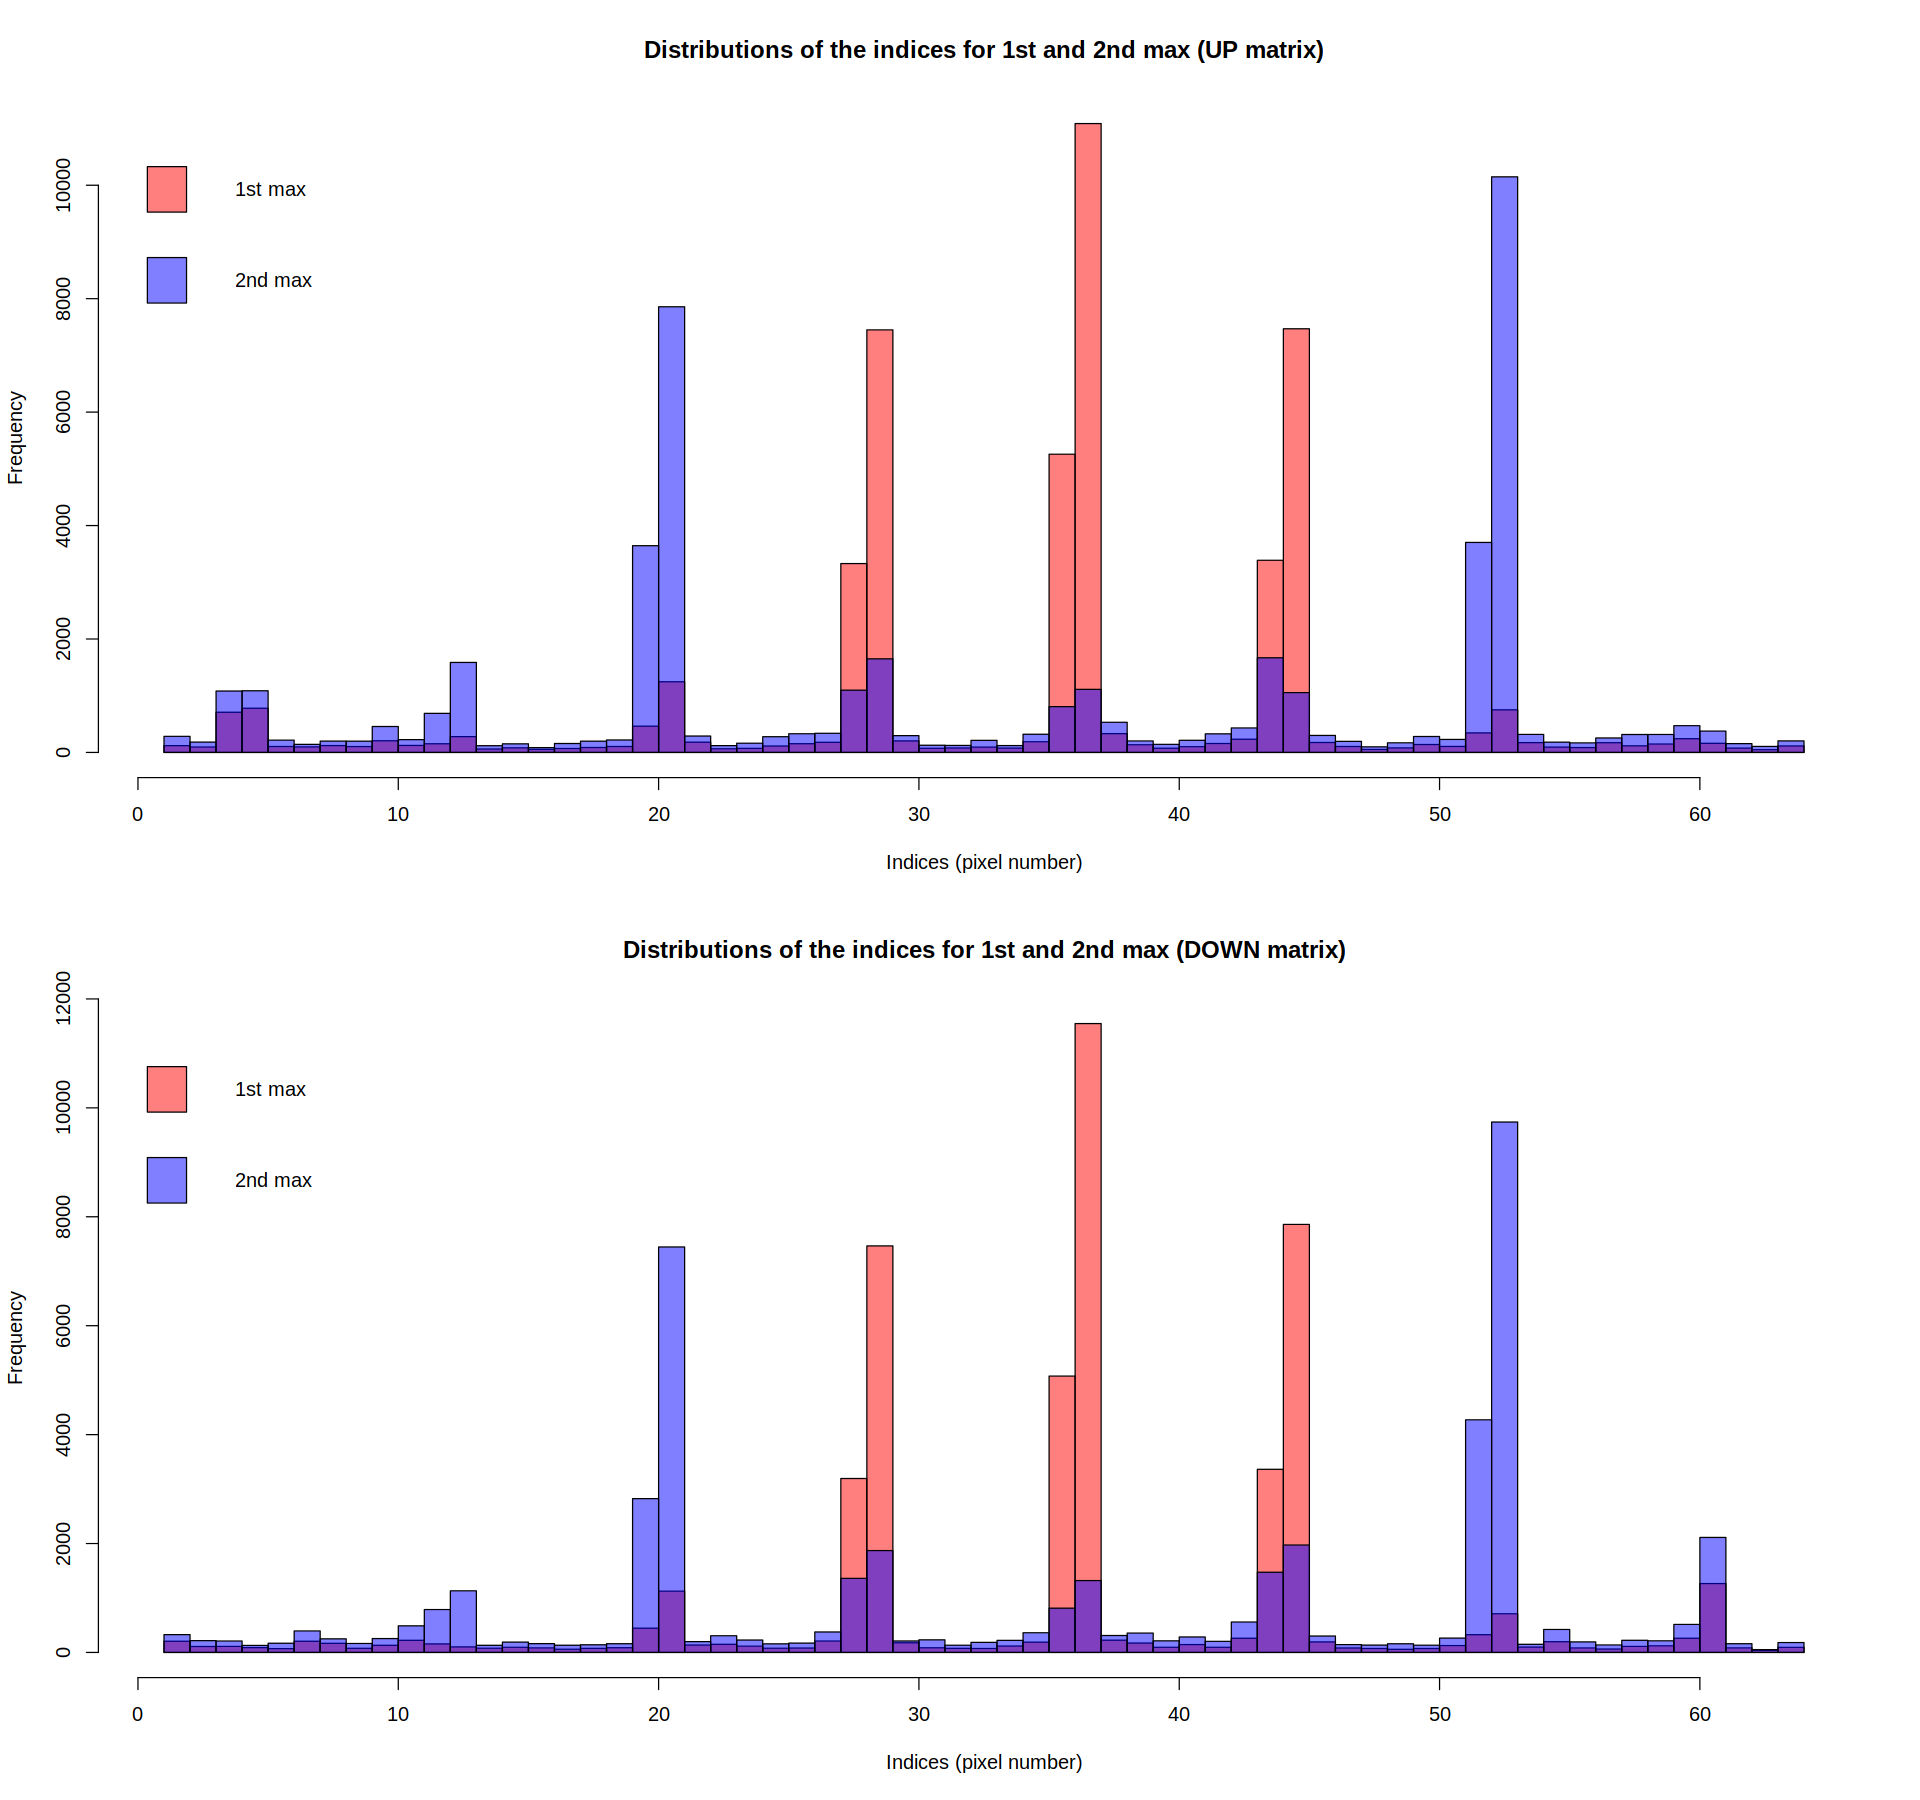

In [13]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 15)
par(cex = 2, mfrow = c(2, 1))

# 1st GRAPH:
hist(data$idx_max_up, 
     breaks=64,
     xlab='Indices (pixel number)', 
     col = rgb(1, 0, 0, 0.5), 
     main='Distributions of the indices for 1st and 2nd max (UP matrix)')

hist(data$idx_max2_up, 
     breaks=64,
     col = rgb(0, 0, 1, 0.5), 
     add=TRUE)

legend('topleft', 
       bty='n',
      legend=c('1st max','2nd max'),
      fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) ) 
      )

# 2nd GRAPH:
hist(data$idx_max_down, 
     breaks=64,
     xlab='Indices (pixel number)', 
     col = rgb(1, 0, 0, 0.5), 
     main='Distributions of the indices for 1st and 2nd max (DOWN matrix)')

hist(data$idx_max2_down, 
     breaks=64,
     col = rgb(0, 0, 1, 0.5), 
     add=TRUE)

legend('topleft', 
       bty='n',
      legend=c('1st max','2nd max'),
      fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) ) 
      )

#### 3. Repeat the same plot but excluding events where the maximum signal is less than 10

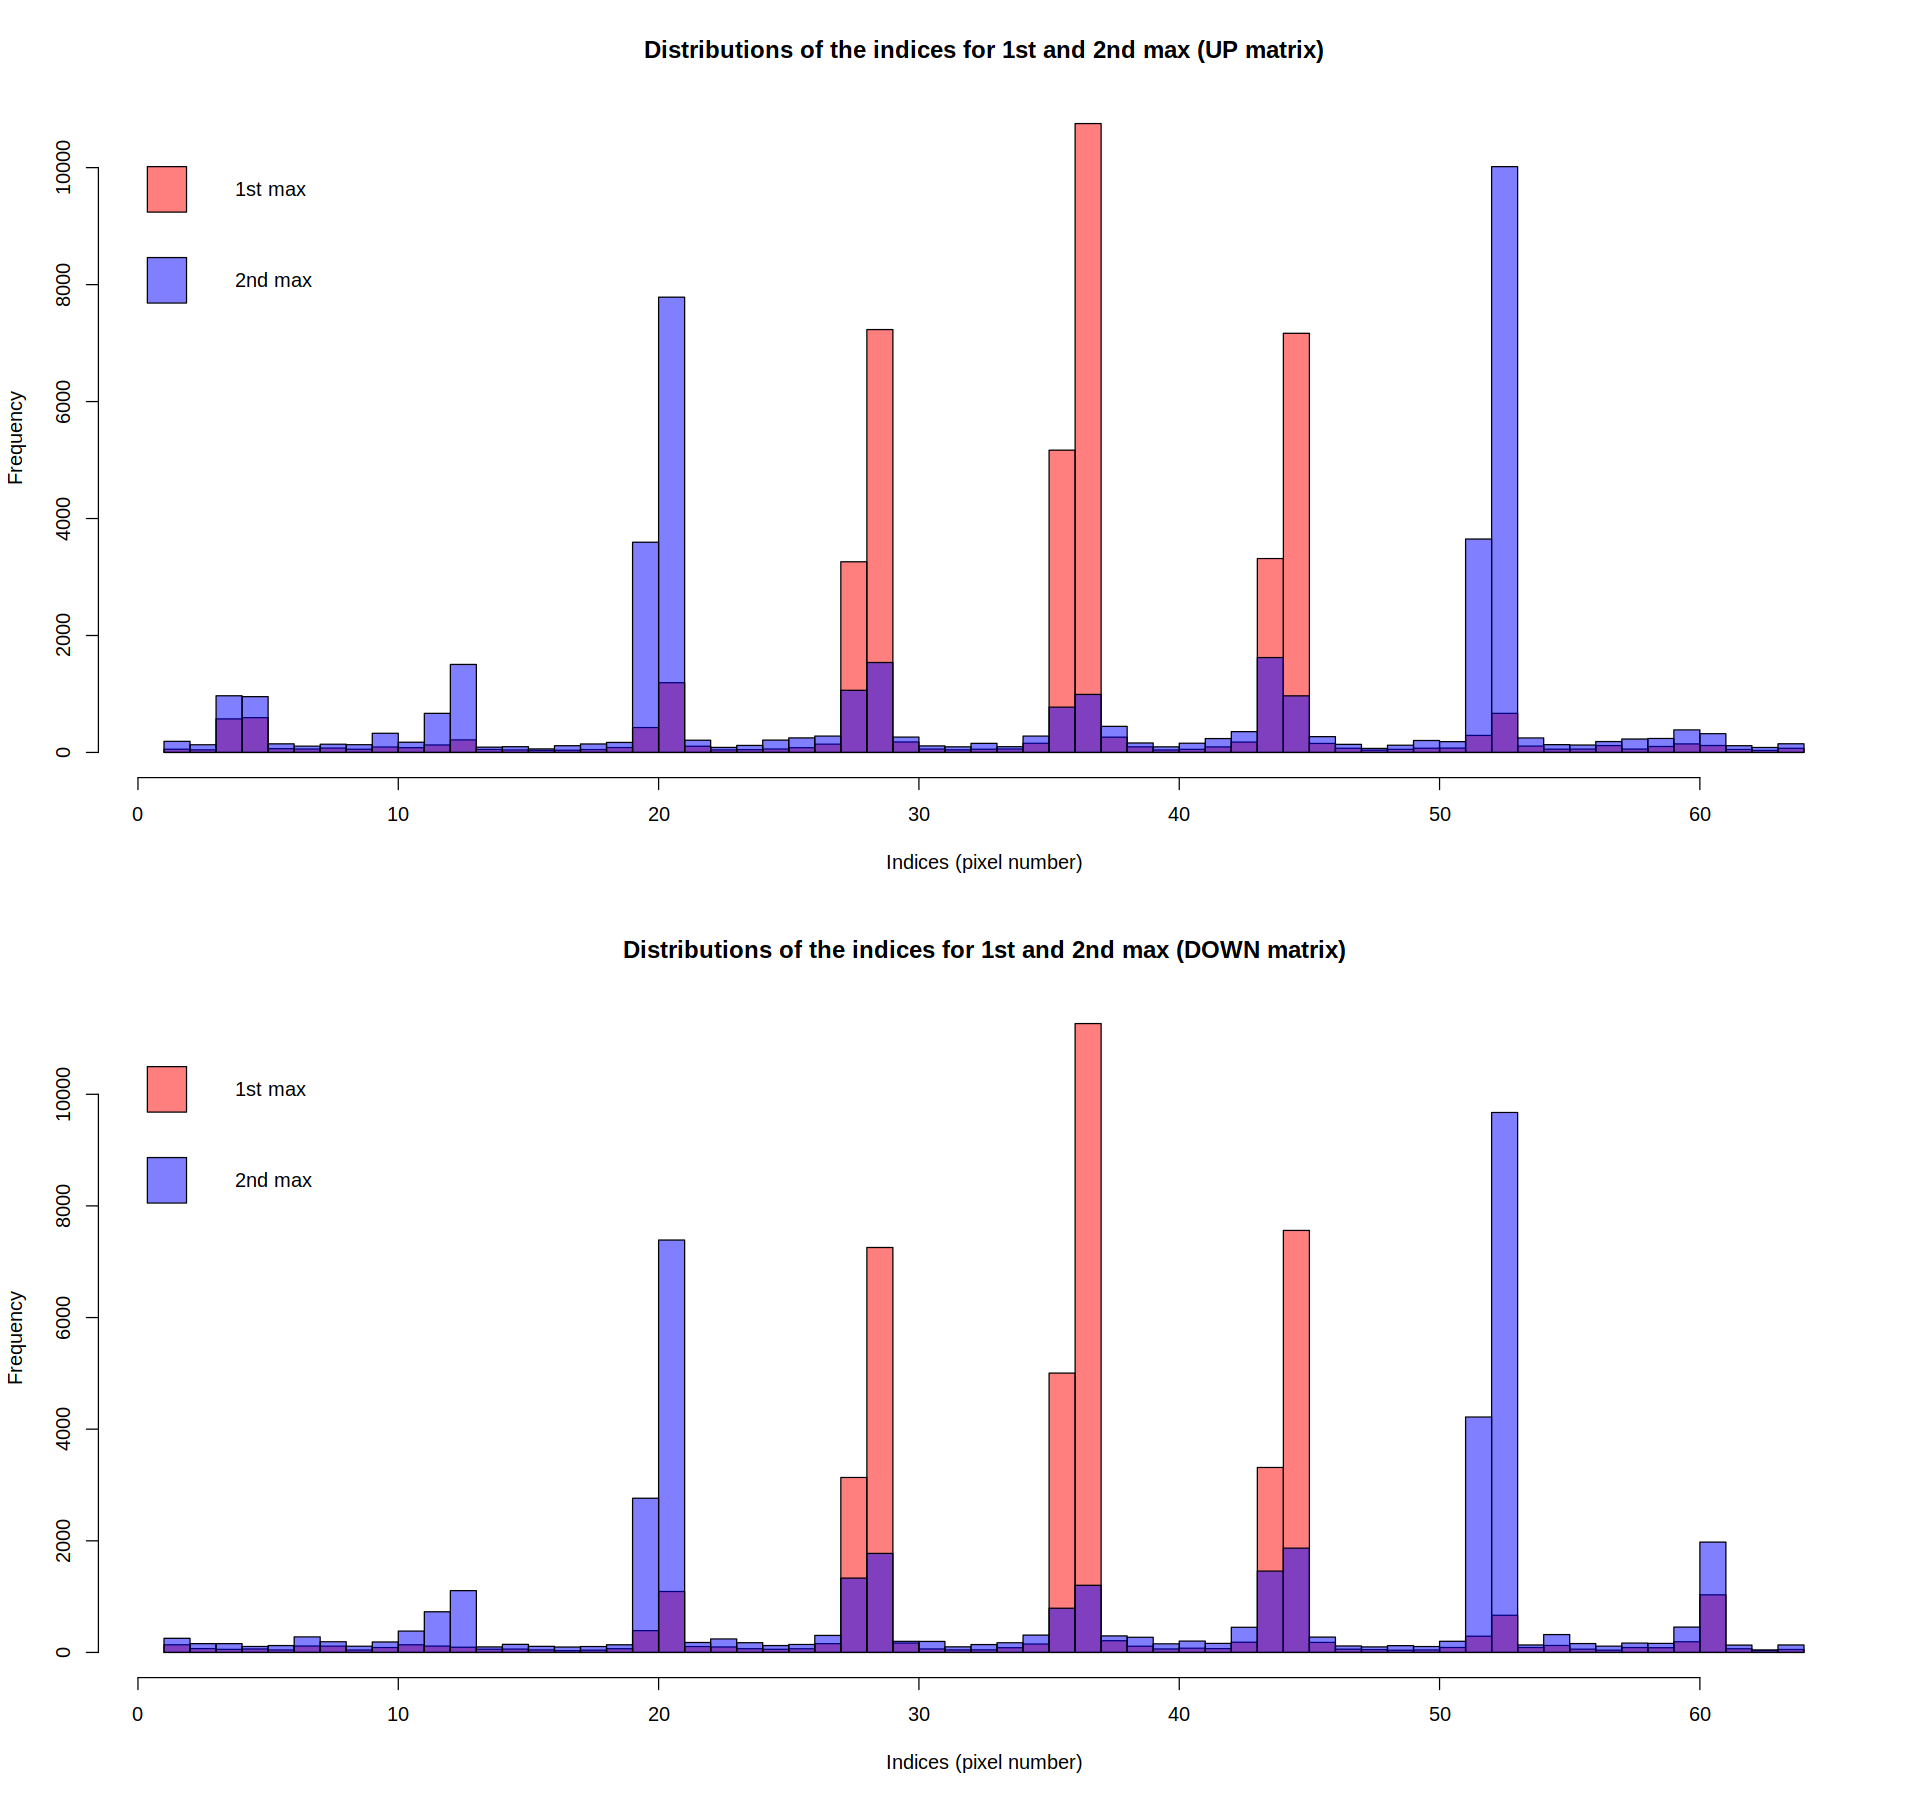

In [16]:
# PLOT:
options(repr.plot.width = 16, repr.plot.height = 15)
par(cex = 2, mfrow = c(2, 1))

# 1st GRAPH:
hist(data$idx_max_up[ data$max_up > 10 ], 
     breaks=64,
     xlab='Indices (pixel number)', 
     col = rgb(1, 0, 0, 0.5), 
     main='Distributions of the indices for 1st and 2nd max (UP matrix)')

hist(data$idx_max2_up[ data$max_up > 10 ], 
     breaks=64,
     col = rgb(0, 0, 1, 0.5), 
     add=TRUE)

legend('topleft', 
       bty='n',
      legend=c('1st max','2nd max'),
      fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) ) 
      )

# 2nd GRAPH:
hist(data$idx_max_down[ data$max_down > 10 ], 
     breaks=64,
     xlab='Indices (pixel number)', 
     col = rgb(1, 0, 0, 0.5), 
     main='Distributions of the indices for 1st and 2nd max (DOWN matrix)')

hist(data$idx_max2_down[ data$max_down > 10 ], 
     breaks=64,
     col = rgb(0, 0, 1, 0.5), 
     add=TRUE)

legend('topleft', 
       bty='n',
      legend=c('1st max','2nd max'),
      fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) ) 
      )

#### 4. Compute event-by-event, the ratio between the second and first maximum values

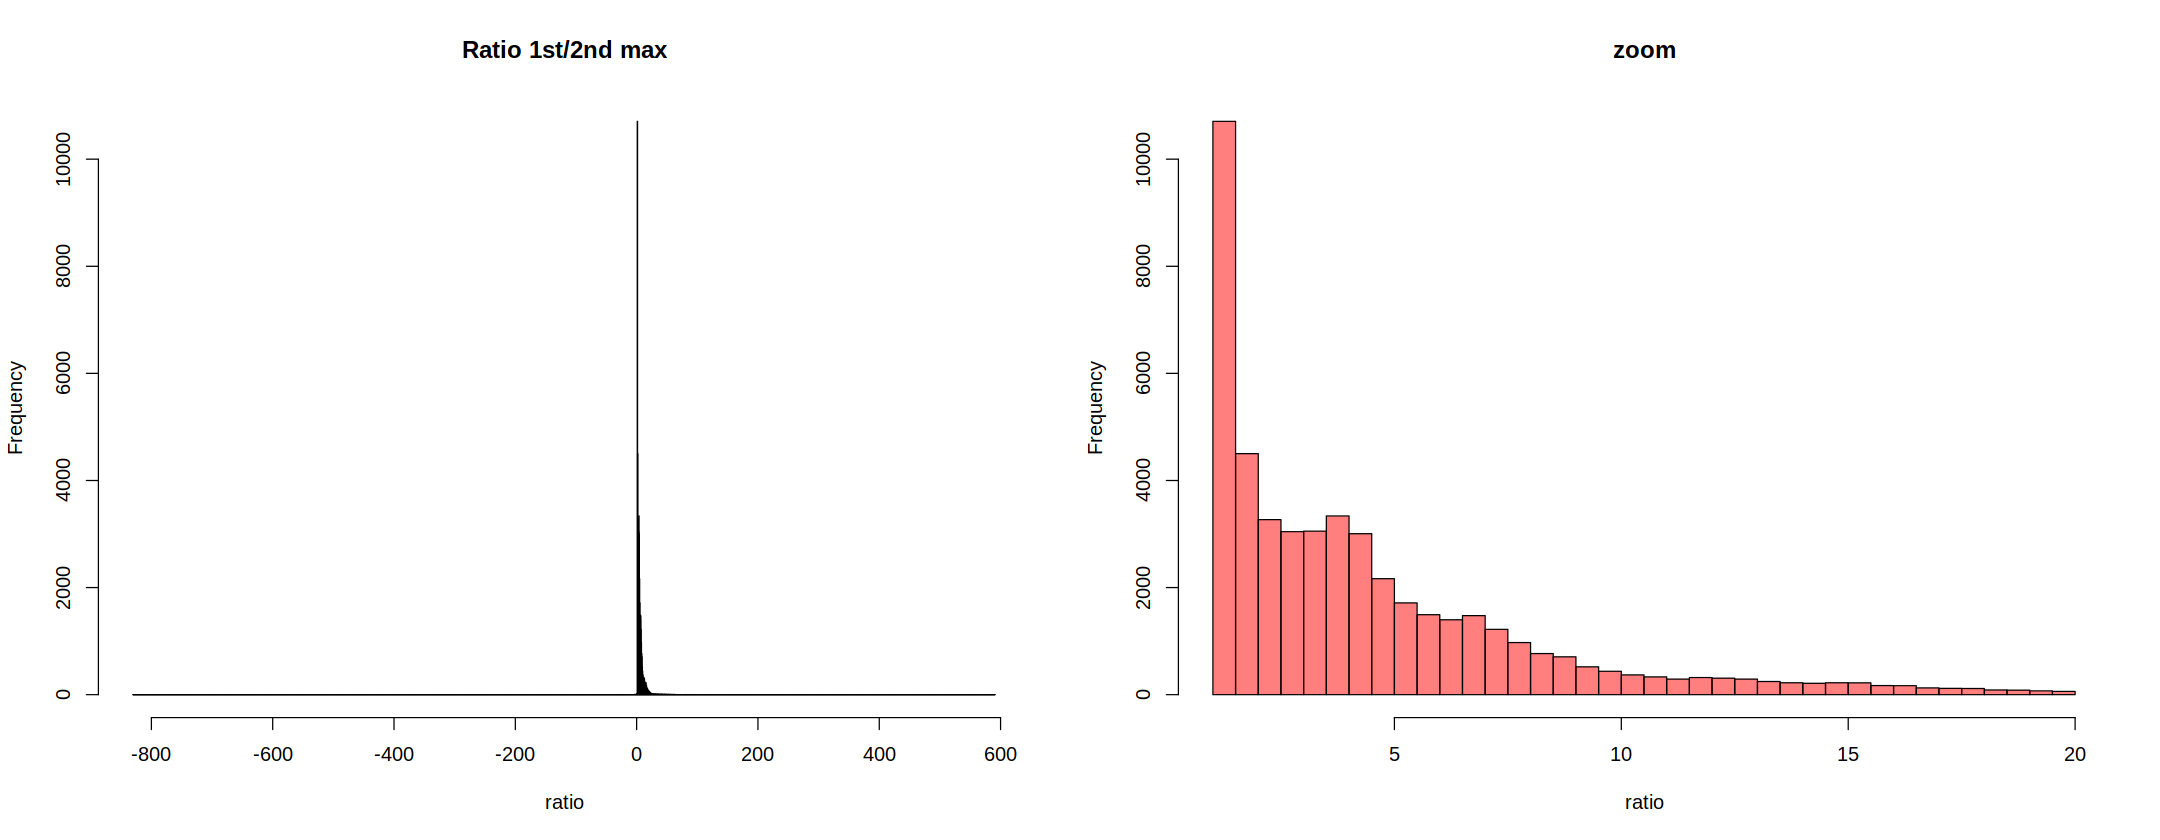

In [39]:
data$ratio_up <- data$max_up / data$max2_up
data$ratio_down <- data$max_down / data$max2_down

# PLOT:
options(repr.plot.width = 18, repr.plot.height = 7)
par(cex = 1.3, mfrow=c(1,2))

hist(data$ratio_up, breaks=3000, main='Ratio 1st/2nd max', xlab='ratio', col = rgb(1, 0, 0, 0.5))
hist(data$ratio_up[ data$ratio_up>1 & data$ratio_up<20 ], breaks=30, main='zoom', xlab='ratio', col = rgb(1, 0, 0, 0.5))

The reason for big negative ratios is probably the presence of little negative values in the denominator of the ratio.

#### 5. Only consider events where both values are greater than zero. Plot the distribution of this ratio in four different signal ranges:
1. 10 ≤ Max < 300
2. 300 ≤ Max < 1200
3. 1200 ≤ Max < 30000
4. Max ≥ 30000

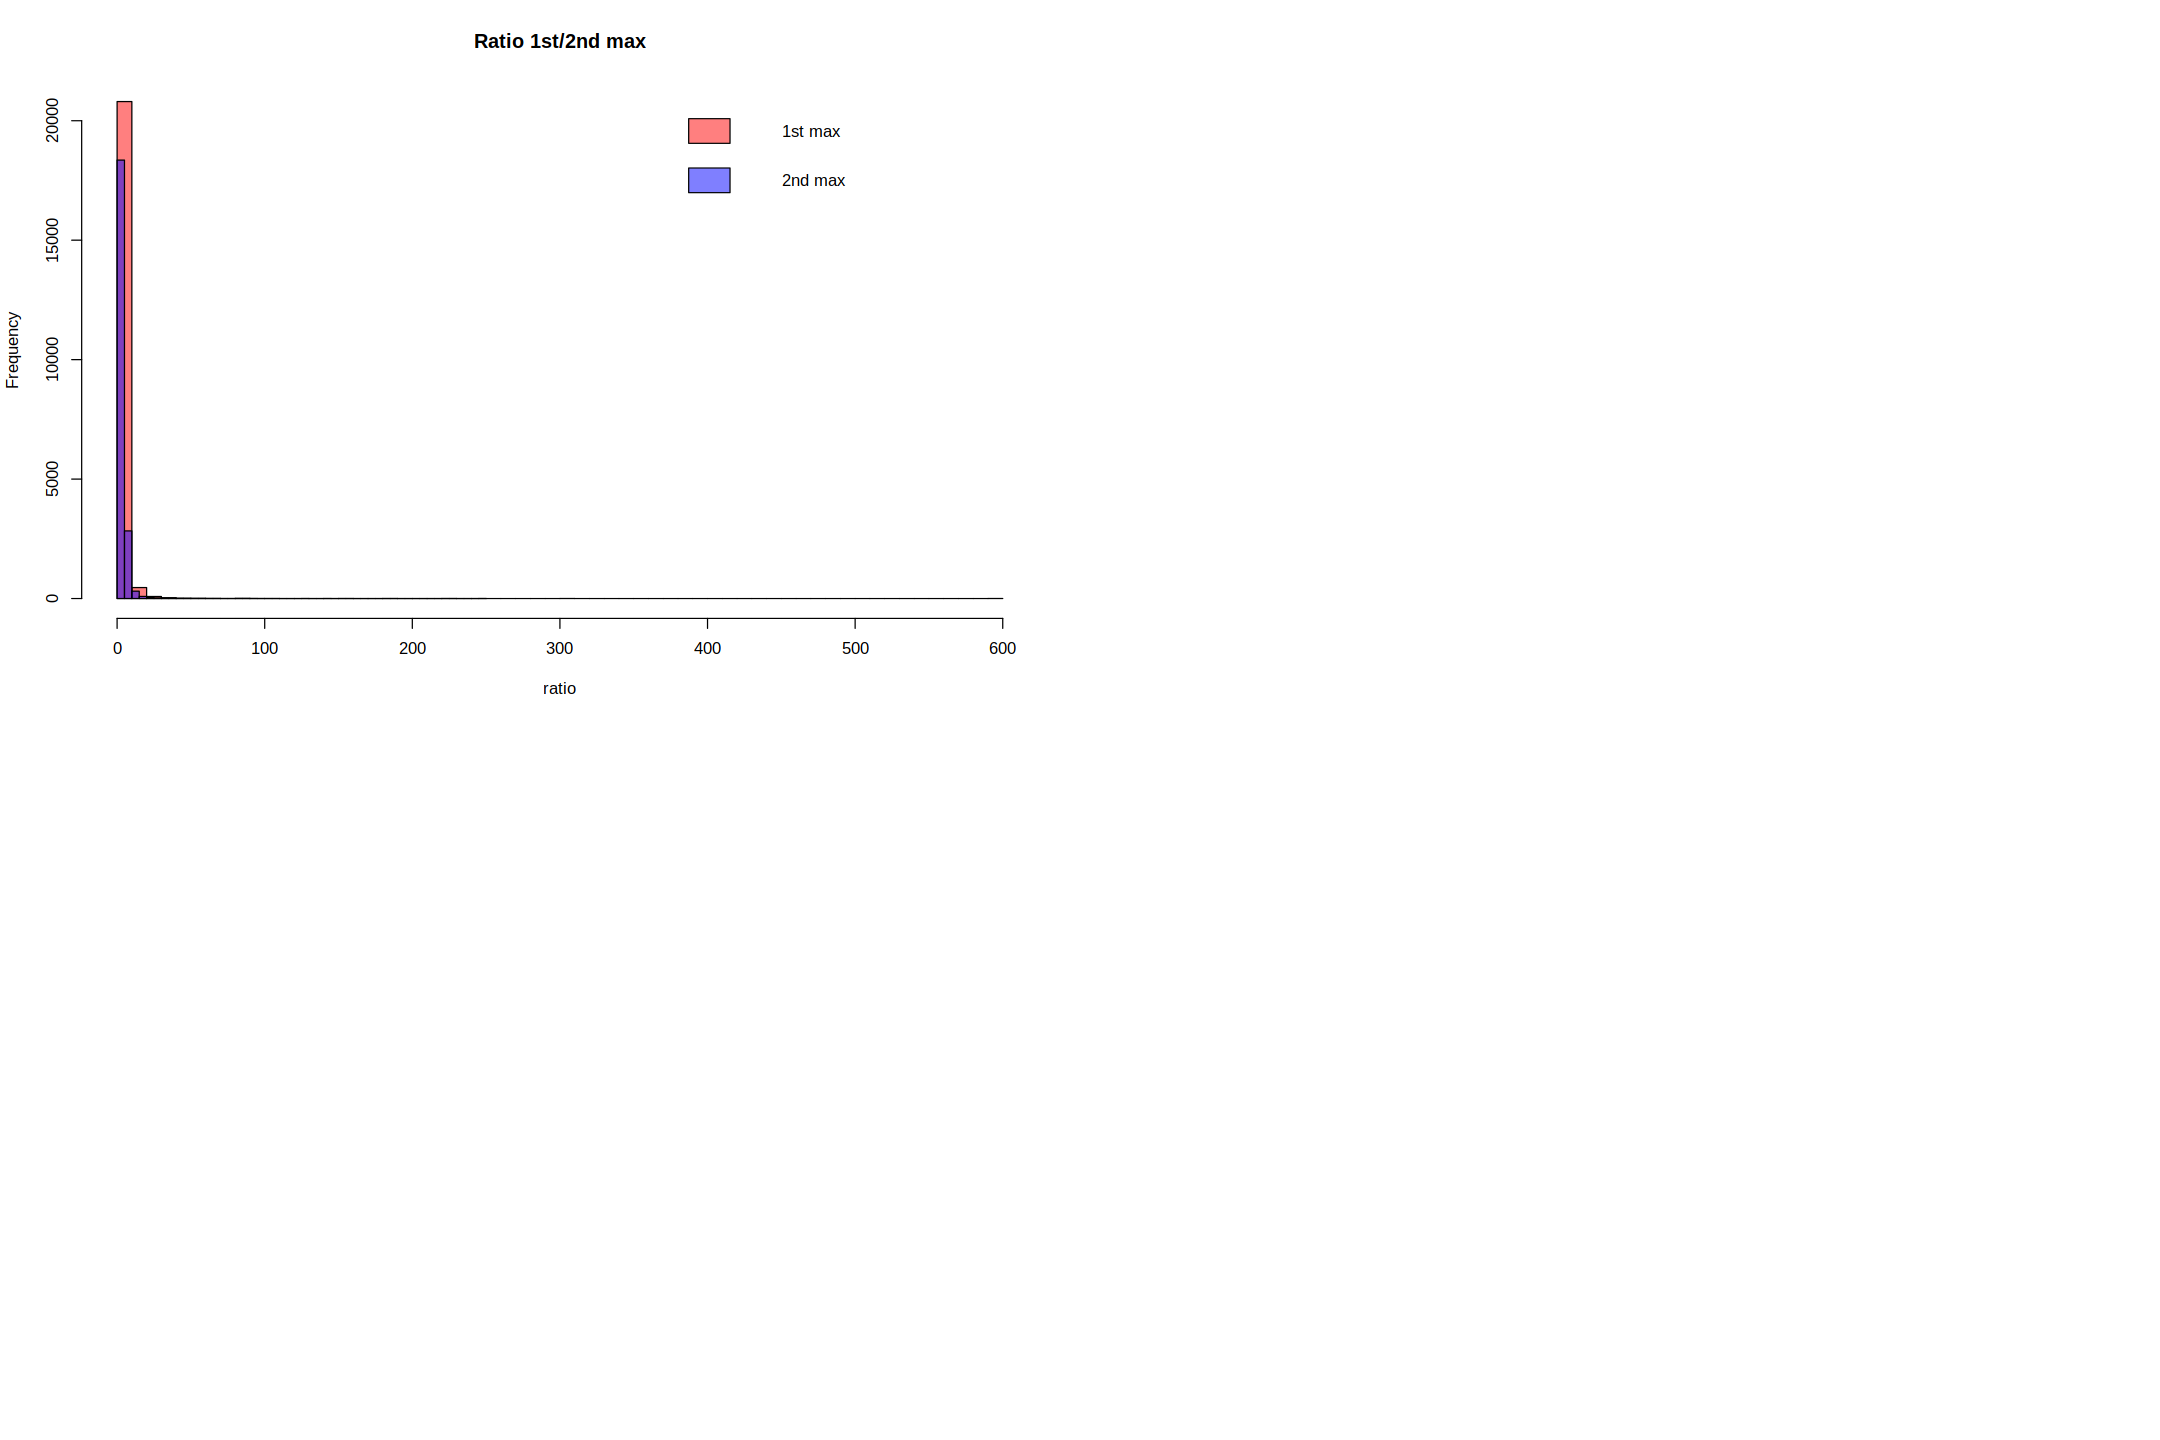

In [45]:
data_cleaned_up <- data[data$max_up > 0 & data$max2_up > 0, ]
data_cleaned_down <- data[data$max_down > 0 & data$max2_down > 0, ]

# general PLOT:
options(repr.plot.width = 18, repr.plot.height = 12)
par(cex = 1.3, mfrow=c(2,2))

# PLOT 1: 10 ≤ Max < 300
hist(data_cleaned_up$ratio_up[ data_cleaned_up$max_up >= 10 & data_cleaned_up$max_up <= 300 ], breaks=50,
     main='Ratio 1st/2nd max', xlab='ratio', col = rgb(1, 0, 0, 0.5))
hist(data_cleaned_down$ratio_down[ data_cleaned_down$max_down >= 10 & data_cleaned_down$max_down <= 300 ], breaks=50,
     main='Ratio 1st/2nd max', xlab='ratio', col = rgb(0, 0, 1, 0.5), add=TRUE)
legend('topright', bty='n', legend=c('1st max','2nd max'), fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) )  )

In [51]:
# debug:
head( sort( data_cleaned_up$ratio_up[ data_cleaned_up$max_up >= 10 & data_cleaned_up$max_up <= 300 ], decreasing=TRUE ) , 40 )

[1] 590.75696 305.30114 229.17973 188.34694 185.55484 150.57143 105.78417
 [8]  99.58824  88.30059  87.73267  85.62931  83.88824  82.33628  80.72973
[15]  80.62422  79.20779  70.21861  66.33677  64.83649  62.01170  60.38149
[22]  58.91837  58.11667  53.48925  52.52147  51.95203  51.29448  51.02884
[29]  50.33912  50.30000  49.44419  48.97629  46.52982  46.44874  46.34151
[36]  46.13333  45.73364  43.09931  42.25745  41.51309

#### 6. Generate heatmaps illustrating the spatial distribution (in terms of row and column) of:
* The maximum pixel indices.
* The second maximum pixel indices.

#### 7. Count the number of times the pixel index of the maximum signal in the upstream matrix matches that of the downstream matrix. Create a bar plot, considering only events where the maximum value exceeds 10.

#### 8. Identify the four most frequently occurring pairs of maximum pixel indices (Max Index Upstream, Max Index Downstream)